In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [4]:
dataset = pd.read_csv('C:/Users/Alexander Bryan/mushroom_dataset_new.csv')

In [5]:
print(dataset.shape)

(8416, 22)


In [7]:
dataset = dataset.drop_duplicates()

In [8]:
print(dataset.shape)

(8124, 22)


In [9]:
for col in dataset:
    print(dataset[col].value_counts())

CONVEX     3656
FLAT       3152
KNOBBED     828
BELL        452
SUNKEN       32
CONICAL       4
Name: cap-shape, dtype: int64
SCALY      3244
SMOOTH     2556
FIBROUS    2320
GROOVES       4
Name: cap-surface, dtype: int64
BROWN       2284
GRAY        1840
RED         1500
YELLOW      1072
WHITE       1040
BUFF         168
PINK         144
CINNAMON      44
PURPLE        16
GREEN         16
Name: cap-color, dtype: int64
NO         4748
BRUISES    3376
Name: bruises, dtype: int64
NONE        3528
FOUL        2160
FISHY        576
SPICY        576
ALMOND       400
ANISE        400
PUNGENT      256
CREOSOTE     192
MUSTY         36
Name: odor, dtype: int64
FREE        7914
ATTACHED     210
Name: gill-attachment, dtype: int64
CLOSE      6812
CROWDED    1312
Name: gill-spacing, dtype: int64
BROAD     5612
NARROW    2512
Name: gill-size, dtype: int64
BUFF         1728
PINK         1492
WHITE        1202
BROWN        1048
GRAY          752
CHOCOLATE     732
PURPLE        492
BLACK         408
R

In [10]:
print(dataset.columns, dataset.shape)

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat', 'mushroom'],
      dtype='object') (8124, 22)


In [11]:
dataset.pop("stalk-root")
print(dataset.columns, dataset.shape)

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
       'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color',
       'ring-number', 'ring-type', 'spore-print-color', 'population',
       'habitat', 'mushroom'],
      dtype='object') (8124, 21)


In [16]:
print(dataset["mushroom"].value_counts())
dataset.replace("EDIBLE", "EDIBLE", inplace = True)
dataset.replace("POISONOUS", "POISONOUS", inplace = True)
dataset. replace("POISONOUS", "POISONOUS", inplace = True)
print(dataset["mushroom"].value_counts())

EDIBLE       4208
POISONOUS    3916
Name: mushroom, dtype: int64
EDIBLE       4208
POISONOUS    3916
Name: mushroom, dtype: int64


In [17]:
dataset.pop("population")
dataset.pop("habitat")
dataset.pop("odor")
print(dataset.columns, dataset.shape)

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'gill-attachment',
       'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape',
       'stalk-surface-above-ring', 'stalk-surface-below-ring',
       'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color',
       'ring-number', 'ring-type', 'spore-print-color', 'mushroom'],
      dtype='object') (8124, 18)


In [19]:
LE = preprocessing.LabelEncoder()

for col in dataset:
    dataset[col] = LE.fit_transform(dataset[col])

for col in dataset:
    print(dataset[col].unique())

[2 3 0 5 4 1]
[3 0 2 1]
[8 9 0 3 7 5 6 4 1 2]
[0 1]
[1 0]
[1 0]
[1 0]
[10  7  1  4  0  3  8  5  9  2 11  6]
[1 0]
[3 0 2 1]
[3 1 0 2]
[7 5 3 1 0 6 2 8 4]
[7 5 3 1 0 6 8 2 4]
[2 3 1 0]
[1 2 0]
[4 0 2 1 3]
[6 1 0 3 4 7 8 5 2]
[0 1]


              precision    recall  f1-score   support

           0       0.96      0.87      0.91      1355
           1       0.85      0.95      0.90      1083

    accuracy                           0.90      2438
   macro avg       0.90      0.91      0.90      2438
weighted avg       0.91      0.90      0.91      2438



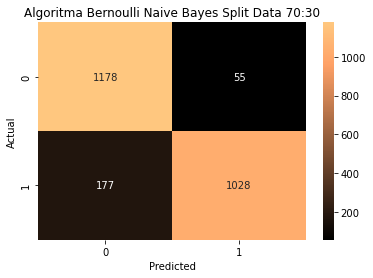

In [64]:
arrData = dataset.values

ciriFisik = arrData[:,:-1]
edibleORnot = arrData[:,-1]

XTrain, XTest, YTrain, YTest = train_test_split(ciriFisik, edibleORnot, test_size = 0.3, random_state = 0)

classifier = BernoulliNB()
classifier.fit(XTrain, YTrain)

YPred = classifier.predict(XTest)

print(classification_report(YPred, YTest))

cm = confusion_matrix(YTest, YPred)
sns.heatmap(cm, annot=True, fmt='d', cmap='copper', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Algoritma Bernoulli Naive Bayes Split Data 70:30')
plt.show()

              precision    recall  f1-score   support

           0       0.95      0.87      0.91      1128
           1       0.86      0.95      0.90       903

    accuracy                           0.91      2031
   macro avg       0.91      0.91      0.91      2031
weighted avg       0.91      0.91      0.91      2031



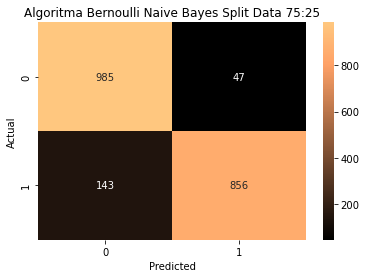

In [65]:
arrData = dataset.values

ciriFisik = arrData[:,:-1]
edibleORnot = arrData[:,-1]

XTrain, XTest, YTrain, YTest = train_test_split(ciriFisik, edibleORnot, test_size = 0.25, random_state = 0)

classifier = BernoulliNB()
classifier.fit(XTrain, YTrain)

YPred = classifier.predict(XTest)

print(classification_report(YPred, YTest))

cm = confusion_matrix(YTest, YPred)
sns.heatmap(cm, annot=True, fmt='d', cmap='copper', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Algoritma Bernoulli Naive Bayes Split Data 75:25')
plt.show()

              precision    recall  f1-score   support

           0       0.95      0.87      0.91       896
           1       0.86      0.95      0.90       729

    accuracy                           0.91      1625
   macro avg       0.91      0.91      0.91      1625
weighted avg       0.91      0.91      0.91      1625



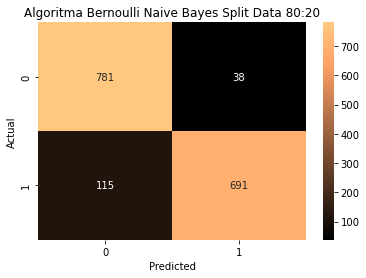

In [69]:
arrData = dataset.values

ciriFisik = arrData[:,:-1]
edibleORnot = arrData[:,-1]

XTrain, XTest, YTrain, YTest = train_test_split(ciriFisik, edibleORnot, test_size = 0.2, random_state = 0)

classifier = BernoulliNB()
classifier.fit(XTrain, YTrain)

YPred = classifier.predict(XTest)

print(classification_report(YPred, YTest))

cm = confusion_matrix(YTest, YPred)
sns.heatmap(cm, annot=True, fmt='d', cmap='copper', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Algoritma Bernoulli Naive Bayes Split Data 80:20')
plt.show()

              precision    recall  f1-score   support

           0       0.91      0.88      0.90      1278
           1       0.87      0.91      0.89      1160

    accuracy                           0.89      2438
   macro avg       0.89      0.89      0.89      2438
weighted avg       0.89      0.89      0.89      2438



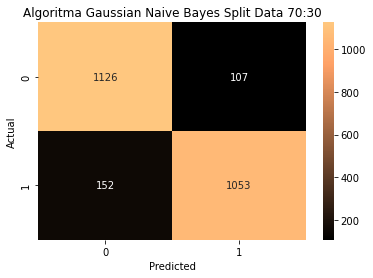

In [70]:
arrData = dataset.values

ciriFisik = arrData[:,:-1]
edibleORnot = arrData[:,-1]

XTrain, XTest, YTrain, YTest = train_test_split(ciriFisik, edibleORnot, test_size = 0.3, random_state = 0)

classifier = GaussianNB()
classifier.fit(XTrain, YTrain)

YPred = classifier.predict(XTest)

print(classification_report(YPred, YTest))

cm = confusion_matrix(YTest, YPred)
sns.heatmap(cm, annot=True, fmt='d', cmap='copper', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Algoritma Gaussian Naive Bayes Split Data 70:30')
plt.show()

              precision    recall  f1-score   support

           0       0.92      0.88      0.90      1075
           1       0.87      0.91      0.89       956

    accuracy                           0.90      2031
   macro avg       0.89      0.90      0.89      2031
weighted avg       0.90      0.90      0.90      2031



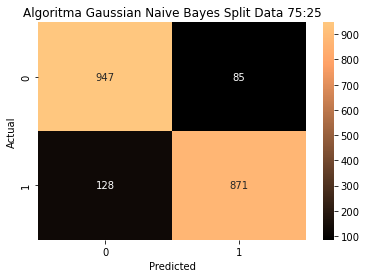

In [71]:
arrData = dataset.values

ciriFisik = arrData[:,:-1]
edibleORnot = arrData[:,-1]

XTrain, XTest, YTrain, YTest = train_test_split(ciriFisik, edibleORnot, test_size = 0.25, random_state = 0)

classifier = GaussianNB()
classifier.fit(XTrain, YTrain)

YPred = classifier.predict(XTest)

print(classification_report(YPred, YTest))

cm = confusion_matrix(YTest, YPred)
sns.heatmap(cm, annot=True, fmt='d', cmap='copper', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Algoritma Gaussian Naive Bayes Split Data 75:25')
plt.show()

              precision    recall  f1-score   support

           0       0.92      0.88      0.90       852
           1       0.87      0.91      0.89       773

    accuracy                           0.90      1625
   macro avg       0.90      0.90      0.90      1625
weighted avg       0.90      0.90      0.90      1625



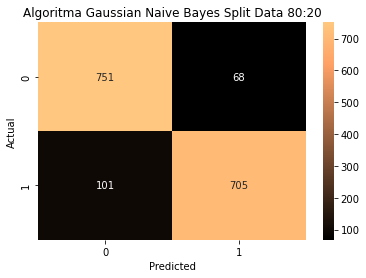

In [72]:
arrData = dataset.values

ciriFisik = arrData[:,:-1]
edibleORnot = arrData[:,-1]

XTrain, XTest, YTrain, YTest = train_test_split(ciriFisik, edibleORnot, test_size = 0.2, random_state = 0)

classifier = GaussianNB()
classifier.fit(XTrain, YTrain)

YPred = classifier.predict(XTest)

print(classification_report(YPred, YTest))

cm = confusion_matrix(YTest, YPred)
sns.heatmap(cm, annot=True, fmt='d', cmap='copper', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Algoritma Gaussian Naive Bayes Split Data 80:20')
plt.show()